In [1]:
from pycaret.datasets import get_data
import pandas as pd

dataset = pd.read_csv('drug200.csv')

In [2]:
#check the shape of data
dataset.shape

(200, 6)

In [3]:
data = dataset.sample(frac=0.9, random_state=799)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (180, 6)
Unseen Data For Predictions: (20, 6)


In [4]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'Drug', session_id=123 ,silent = True) 

,Description,Value
0,session_id,123
1,Target,Drug
2,Target Type,Multiclass
3,Label Encoded,"DrugY: 0, drugA: 1, drugB: 2, drugC: 3, drugX: 4"
4,Original Data,"(180, 6)"
5,Missing Values,0
6,Numeric Features,2
7,Categorical Features,3
8,Ordinal Features,0
9,High Cardinality Features,0


In [5]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9833,0.6000,0.9667,0.9812,0.9803,0.9745,0.9764,0.4670
dt,Decision Tree Classifier,0.9833,0.6000,0.9667,0.9790,0.9795,0.9739,0.9759,0.0170
rf,Random Forest Classifier,0.9756,0.6000,0.9467,0.9651,0.9684,0.9622,0.9651,0.2660
gbc,Gradient Boosting Classifier,0.9679,0.6000,0.9417,0.9508,0.9571,0.9494,0.9539,0.3380
lightgbm,Light Gradient Boosting Machine,0.9596,0.6000,0.9467,0.9664,0.9574,0.9388,0.9432,0.0830
et,Extra Trees Classifier,0.9519,0.5992,0.9242,0.9546,0.9485,0.9308,0.9355,0.2320
lda,Linear Discriminant Analysis,0.8801,0.5949,0.9127,0.9185,0.8795,0.8330,0.8476,0.0170
ada,Ada Boost Classifier,0.8635,0.5782,0.6517,0.7796,0.8123,0.7905,0.8046,0.1000
ridge,Ridge Classifier,0.8558,0.0000,0.7033,0.8012,0.8175,0.7789,0.7946,0.0100
nb,Naive Bayes,0.7513,0.5620,0.8672,0.8554,0.7383,0.6658,0.7091,0.0110


In [6]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9167,0.0000,0.7500,0.8542,0.8810,0.8696,0.8796
6,0.9167,0.0000,0.9167,0.9583,0.9222,0.8750,0.8843
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [7]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [8]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9167,0.0000,0.7500,0.8611,0.8833,0.8710,0.8806
6,0.9167,0.0000,0.9167,0.9286,0.9115,0.8681,0.8786
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [9]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9231,1.0000,0.8000,0.8615,0.8889,0.8829,0.8915
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9167,0.0000,0.7500,0.8611,0.8833,0.8710,0.8806
6,0.9167,0.0000,0.9167,0.9286,0.9115,0.8681,0.8786
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [10]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9167,0.0000,0.9167,0.9583,0.9222,0.8750,0.8843
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [11]:
print(tuned_lr)

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [12]:
##import numpy as np
##tuned_dt = tune_model(dt, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

In [13]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9167,0.0000,0.7500,0.8611,0.8833,0.8710,0.8806
6,0.9167,0.0000,0.9167,0.9286,0.9115,0.8681,0.8786
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


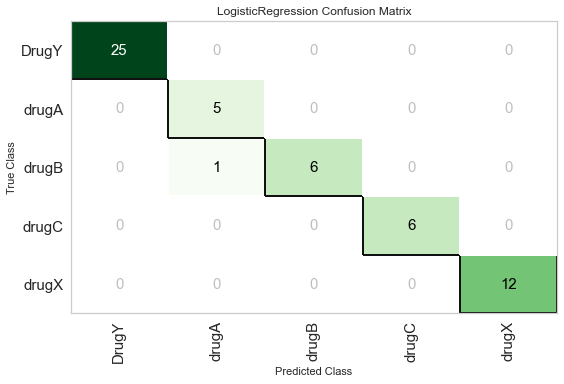

In [14]:
plot_model(tuned_lr, plot = 'confusion_matrix')

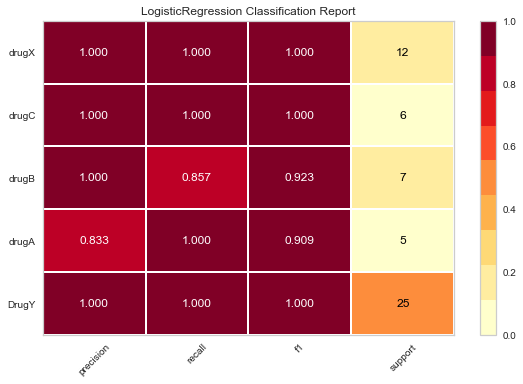

In [15]:
plot_model(tuned_lr, plot = 'class_report')

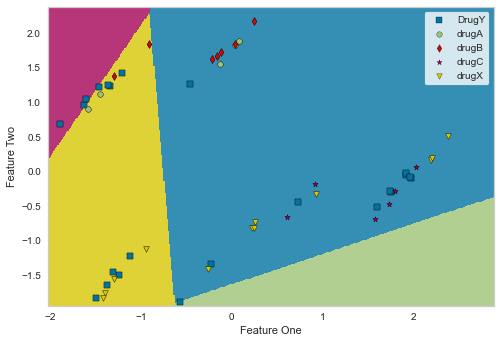

In [16]:
plot_model(tuned_lr, plot='boundary')

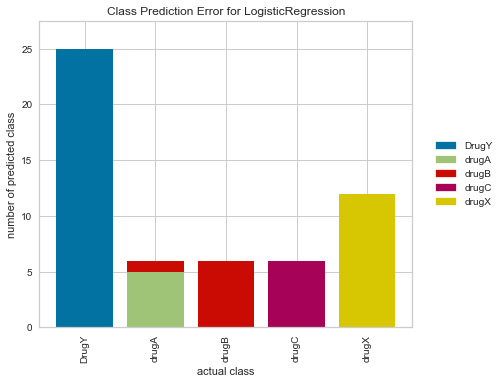

In [17]:
plot_model(tuned_lr, plot = 'error')

In [18]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9818,1.0000,0.9714,0.9848,0.9819,0.9744,0.9748


In [20]:
final_lr = finalize_model(tuned_lr)

In [21]:
print(final_lr)

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [22]:
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.0000,0.9858,0,0,0,0,0


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Label,Score
0,74,F,LOW,HIGH,20.942,DrugY,DrugY,1.0000
1,65,F,HIGH,NORMAL,31.876,DrugY,DrugY,1.0000
2,39,M,LOW,NORMAL,13.938,drugX,drugX,0.8198
3,39,F,NORMAL,NORMAL,9.709,drugX,drugX,0.9999
4,15,M,NORMAL,HIGH,9.084,drugX,drugX,0.7884


In [23]:
save_model(final_lr,'Final LR Model 08Feb2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Drug',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=7.863, class_weight={}, dual=False,
                 

In [24]:
saved_final_lr = load_model('Final LR Model 08Feb2020')

Transformation Pipeline and Model Successfully Loaded


In [25]:
new_prediction = predict_model(saved_final_lr, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.0000,0.9858,0,0,0,0,0


In [26]:
new_prediction.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Label,Score
0,74,F,LOW,HIGH,20.942,DrugY,DrugY,1.0000
1,65,F,HIGH,NORMAL,31.876,DrugY,DrugY,1.0000
2,39,M,LOW,NORMAL,13.938,drugX,drugX,0.8198
3,39,F,NORMAL,NORMAL,9.709,drugX,drugX,0.9999
4,15,M,NORMAL,HIGH,9.084,drugX,drugX,0.7884
